<a href="https://colab.research.google.com/github/mdaugherity/MachineLearning2023/blob/main/HW1_DIY_1D_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Dr D  
Class: PHYS453 - Machine Learning  
Date: Spring 2023

# HW1 - DIY 1D Classifier
In this assignment you will use **brutal force** to find a single decision boundary threshold for a one feature classifier.  You'll find some metrics to help calculate the optimal place, and try to convince me that it actually works.




In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

## Requirements
* "Hours of coding will save you minutes of design".  Make a plan first.
* You do not _need_ to make a class or define functions, but some functions will make your life easier
* You are submitting a **report**, not just a program.  You need to use the template below where your code is interspersed with markdown cells for discussion and explanations. 
* Yes: in the template you need to restate (not copy) the problem description and _explain_ the solution method.  **Do not skip any sections.**

## A note on functions:
Defining functions makes your life easier.  For example, take a gross thing you have to do lots of times.  Instead of copying and pasting make a function


In [2]:
def dist2(a,b):
    """Returns the distance squared between 1D numpy arrays a and b"""
    return( ((a-b)**2).sum() )

In [3]:
a = np.array([1,2])
b = np.array([5,4])
dist2(a,b)

20

We will soon be using a library that has functions like:
* `fit(X,y)` to train the classifier 
* `predict(X)` to classify new points

## The Iris Dataset
This is a famous example in machine learning using 4 measurements as features to distinguish between 3 species of irises.  We talked through the details in class, so we'll keep it simple for now.

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html 


In [4]:
Xall, yall = datasets.load_iris(return_X_y=True)
print('Feature data shape: ',Xall.shape)
print('The targets are: ',np.unique(yall))

Feature data shape:  (150, 4)
The targets are:  [0 1 2]


`X` has 150 flowers (each row is a sample) with 4 features (columns).  The `y` array is the species number (0, 1, or 2).  *We will ignore species 2 for today.*



In [5]:
X = Xall[yall<2]  # get rid of species 2
y = yall[yall<2]

You can access data for a single species easily:

In [6]:
X[ y==0 ].shape   # only species 0, you can save this as a new variable if you like

(50, 4)


More examples:
```
X[:,0]  #  only feature 0, all speciees
X[y==1, 2] # feature 2, species 1
```

The first 50 samples are species 0, so you can iterate through them using

```
for i in range(50):
  print(X[i])
```

Or:

```
X0 = X[y==0]
for i in range(len(X0)):

```

Or:
```
for i,xval in enumerate(X0)
```




In [7]:
for i,xval in enumerate(X):
  if i<5:
    print(i,xval)

0 [5.1 3.5 1.4 0.2]
1 [4.9 3.  1.4 0.2]
2 [4.7 3.2 1.3 0.2]
3 [4.6 3.1 1.5 0.2]
4 [5.  3.6 1.4 0.2]


Visualize the features with violin plots:
* https://matplotlib.org/stable/gallery/statistics/violinplot.html
* https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.violinplot.html#matplotlib.pyplot.violinplot 



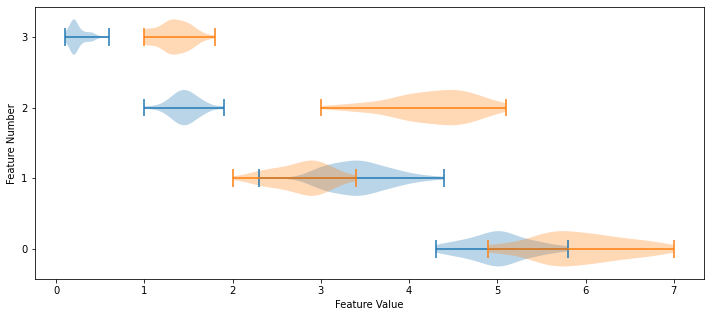

In [8]:
plt.figure(figsize=(12,5))
featnum = np.arange(4) # locations for each feature = [0,1,2,3]
for i in range(2):
  plt.violinplot(X[y==i,:], positions=featnum, vert=False)  

plt.xlabel('Feature Value')
plt.ylabel('Feature Number')
plt.yticks(ticks = featnum)
plt.show()

## Problems

Write two bits of code (hopefully functions):
1. Given a feature number and a threshold, calculate the accuracy in using this threshold to classify species 0 from species 1.  **You can make the (sometimes terrible) assumption that $ X < thresh $ is always species 0**
1. Use brute force to try lots and lots of possible thresholds and find the best one.
 

---
# HOMEWORK REPORT TEMPLATE
---

## Problem Description
goes here


## Solution Method
Your plan of attack.  Explain what you are going do to solve the stated problem.


## Input
Load and pre-process data

## Analysis
Do all the work here


## Results
Produce the lovely plots and/or data tables that best visualization your solution

## Discussion
Explain and interpret your results.  Explain how your results solve the problem.  Also describe anything interesting you discovered along the way, or lessons learned, or how you overcame problems you encountered.     